In [1]:
from commonfunctions import *
from skimage import io
from skimage.color import rgba2rgb, rgb2gray
from skimage import filters
import numpy as np
import cv2

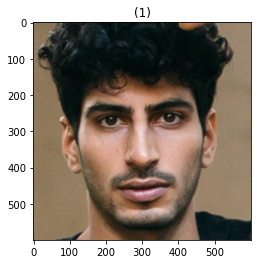

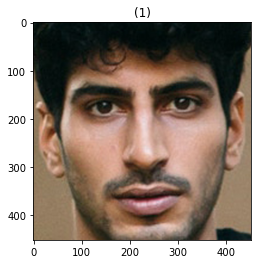

In [407]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

'''
    'haarcascade_frontalface_default.xml': This 'XML' file contains a pre-trained model that was created through extensive training 
    
    Cascade classifiers are trained using several positive (with faces or objects) images and arbitrary negative (without faces or objects) images. 
        OpenCV contains several pretrained cascading classifiers used in image processing to detect frontal views of faces and the upper body.
    
'''

faceimg = cv2.imread("images/Real/real_00015.jpg")

colorB = np.copy(faceimg[:,:,0])
colorR = np.copy(faceimg[:,:,2])
faceimg[:,:,0] = colorR
faceimg[:,:,2] = colorB
show_images([faceimg])

faces = faceCascade.detectMultiScale(faceimg,minNeighbors=int(0.003*faceimg.shape[0]))

Cropped_faces = []
for face in faces:
    Cropped_faces.append(np.copy(faceimg[face[1]:face[1]+face[3],face[0]:face[0]+face[2],:]))

show_images(Cropped_faces)



[[ 94 135  81  81]
 [252 114 101 101]]


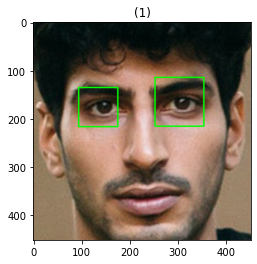

In [408]:
eyeImage = np.copy(Cropped_faces[0])
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
left_eyes = eye_cascade.detectMultiScale(eyeImage[0:eyeImage.shape[0]//2,0:eyeImage.shape[1],:],minNeighbors=int(0.0145* eyeImage.shape[0]),minSize=(eyeImage.shape[0]//8, eyeImage.shape[0]//8))
print(left_eyes)


for (x, y, w, h) in left_eyes:
    cv2.rectangle(eyeImage, (x, y), (x+w, y+h), (0, 255, 0), 2)
show_images([eyeImage])



599 0 0.1
1 0.1 0.1
0.1 [[147  72 145  72]]


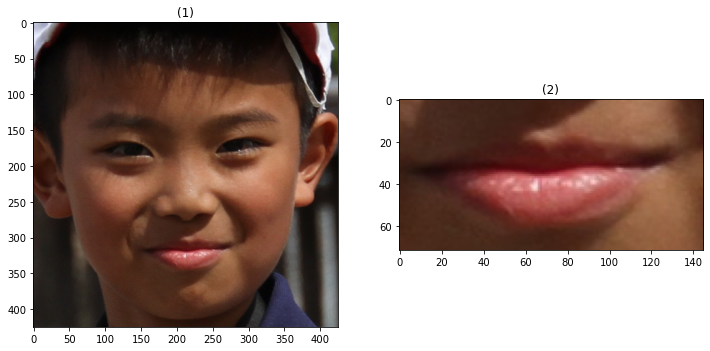

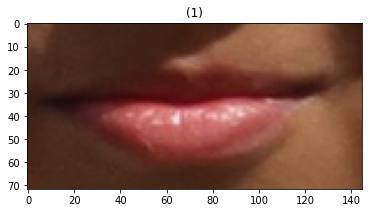

In [393]:
face = np.copy(Cropped_faces[0])
# face1 = np.copy(Cropped_faces[1])
# face2 = np.copy(Cropped_faces[2])
# face3 = np.copy(Cropped_faces[3])
# face4 = np.copy(Cropped_faces[4])
# face5 = np.copy(Cropped_faces[5])


def detectMouth(mouth_cascade, img=np.zeros((1,1))):
    copyImg = np.copy(img)
    flag = 1
    start = 0
#     end = 1
    step = 0.1
    while flag:
        mouth = mouth_cascade.detectMultiScale(copyImg[copyImg.shape[0]//2:copyImg.shape[0],:,:], minSize=(25, 15),minNeighbors=int(start*face.shape[0]))
        print(len(mouth), start, step)
#         end += step
        if len(mouth) == 1:
            print(start,mouth)
            show_images([copyImg,np.copy(copyImg[copyImg.shape[0]//2 + mouth[0][1]:copyImg.shape[0]//2 + mouth[0][1] + mouth[0][3],mouth[0][0]:mouth[0][0] + mouth[0][2],:])])
            return np.copy(copyImg[copyImg.shape[0]//2 + mouth[0][1]:copyImg.shape[0]//2 + mouth[0][1] + mouth[0][3],mouth[0][0]:mouth[0][0] + mouth[0][2],:])
        elif len(mouth) == 0:
            if(start == 0):
                print("I am here")
                return np.zeros((1,1))
            start -= step
            step = step /10
            flag = 1
            print(start)
        else:
            flag = 1
        start += step
#         for m in mouth:
#             show_images([copyImg,np.copy(copyImg[m[1]:m[3],mouth[0][0]:mouth[0][2],:])])
            
show_images([detectMouth(cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml'), face)])
# detectMouth(cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml'), face1)
# detectMouth(cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml'), face2)
# detectMouth(cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml'), face3)
# detectMouth(cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml'), face4)
# detectMouth(cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml'), face5)


# mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'ourMouth.xml')

# # mouth = mouth_cascade.detectMultiScale(face, scaleFactor=1.1, minNeighbors=int(0.4*face.shape[1]), minSize=(15, 15), flags=cv2.CASCADE_SCALE_IMAGE)
# mouth = mouth_cascade.detectMultiScale(face[face.shape[0]//2:face.shape[0],:,:], minSize=(25, 15),minNeighbors=int(0.06*face.shape[0]))
# print(len(mouth))

# show_images([face[face.shape[0]//2:face.shape[0],:,:]])

# for (x, y, w, h) in mouth:
#     cv2.rectangle(face, (x, face.shape[0]//2 + y), (x+w, face.shape[0]//2 +y+h), (0, 255, 0), 2)
# show_images([face, face[face.shape[0]//2 +y:face.shape[0]//2 +y+h,x:x+w,:]])